In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [5]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop the Colunm

In [7]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [8]:
df.sample(5)

,v1,v2
798,ham,Ok i msg u b4 i leave my house.
5260,ham,If anyone calls for a treadmill say you'll buy...
4511,ham,Now project pa. After that only i can come.
1555,ham,Ok i found dis pierre cardin one which looks n...
3907,ham,Sounds like a plan! Cardiff is still here and ...


Rename the Colunm

In [9]:
df.rename(columns={"v1": "Spam/Ham", "v2": "Text"}, inplace=True)
df.sample(4)

,Spam/Ham,Text
2970,ham,Height of Confidence: All the Aeronautics prof...
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...
5109,ham,Oh you got many responsibilities.
1781,ham,";-( oh well, c u later"


Doing Encoding Encoding of Output

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Spam/Ham'] = encoder.fit_transform(df['Spam/Ham'])

In [12]:
df.head()

,Spam/Ham,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

,0
Spam/Ham,0
Text,0


In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

**EDA Step**

In [18]:
df['Spam/Ham'].value_counts()

,count
Spam/Ham,
0,4516
1,653


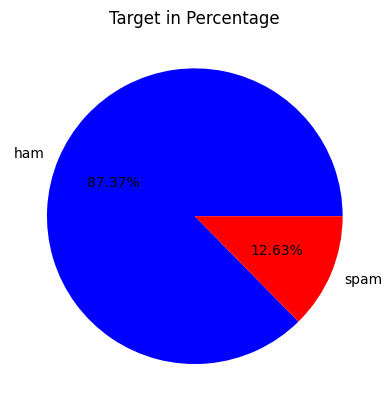

In [19]:
plt.pie(df['Spam/Ham'].value_counts(),
        labels=['ham', 'spam'],
        autopct="%0.2f%%",
        colors=['blue', 'red'])
plt.title("Target in Percentage")
plt.show()

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['num_characters'] = df['Text'].apply(len)

In [24]:
df.head()

,Spam/Ham,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.sample(4)

,Spam/Ham,Text,num_characters,num_words
4595,0,Carlos is down but I have to pick it up from h...,86,23
643,0,Ya very nice. . .be ready on thursday,37,9
3527,1,You are a å£1000 winner or Guaranteed Caller P...,150,26
5190,1,Our records indicate u maybe entitled to 5000 ...,156,32


In [28]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(4)

,Spam/Ham,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['Spam/Ham'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['Spam/Ham'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text(0.5, 1.0, 'difference between the ham and spam SMS for characters')

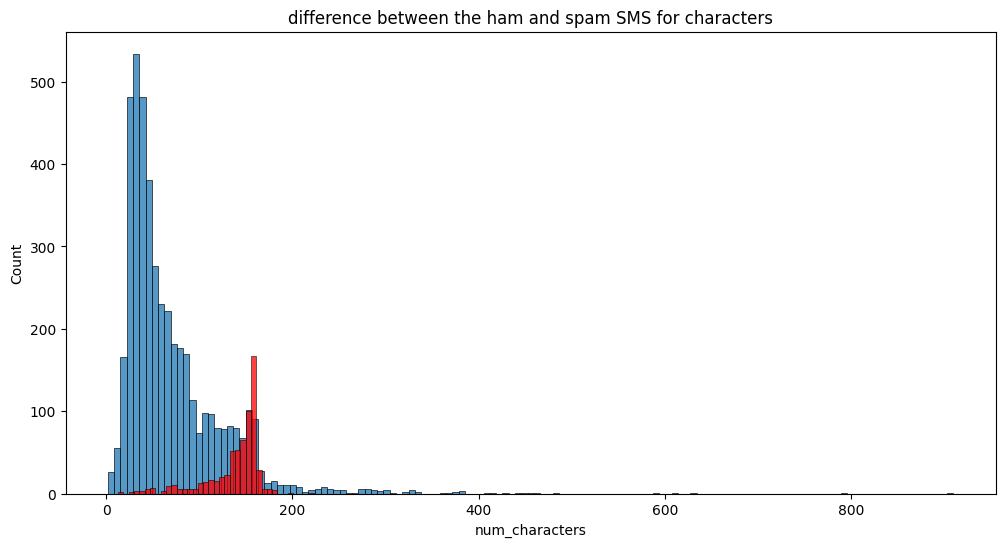

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Spam/Ham'] == 0]['num_characters'])
sns.histplot(df[df['Spam/Ham'] == 1]['num_characters'],color='red')
plt.title("difference between the ham and spam SMS for characters")

Text(0.5, 1.0, 'difference between the ham and spam SMS for Number of words')

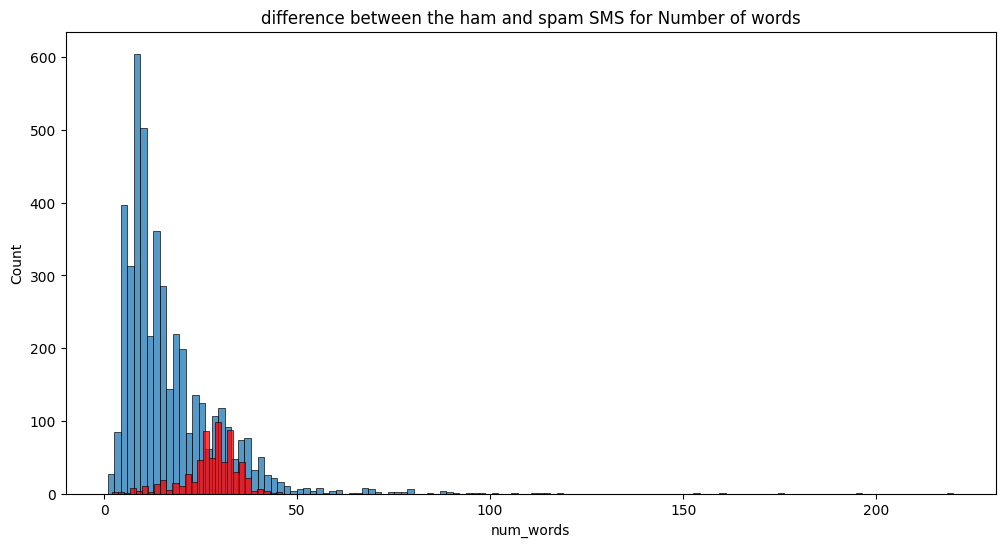

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Spam/Ham'] == 0]['num_words'])
sns.histplot(df[df['Spam/Ham'] == 1]['num_words'],color='red')
plt.title("difference between the ham and spam SMS for Number of words")

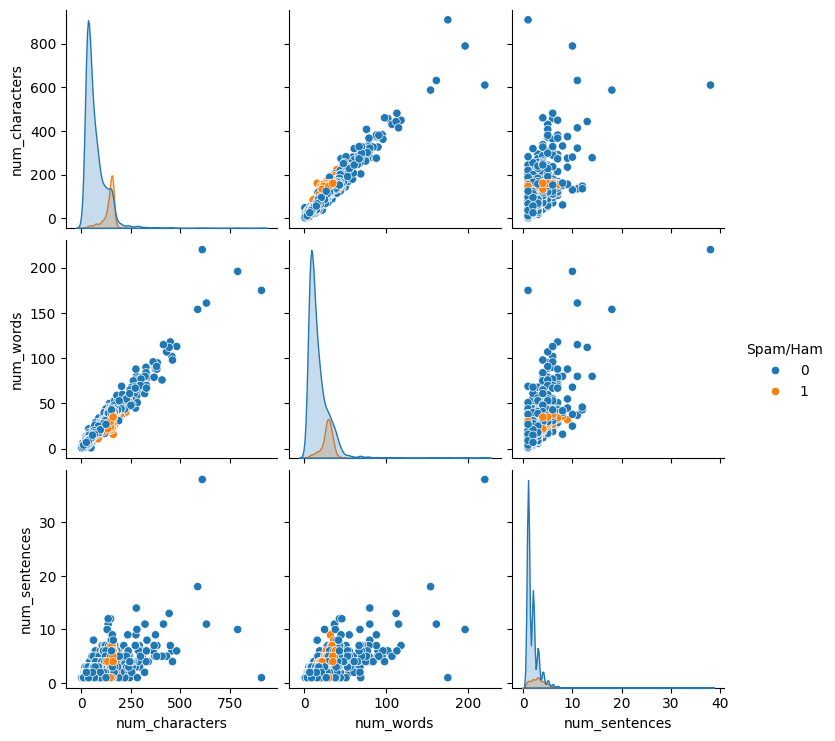

In [35]:
sns.pairplot(df,hue='Spam/Ham')


**Preprocessing Step**

*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [37]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
ps = PorterStemmer()

In [57]:
def Transform_text(text):

    text = text.lower()

    text = nltk.word_tokenize(text)

    cleaned_words = []

    # Removing special characters
    for word in text:
      if word.isalnum():
        cleaned_words.append(word)

    # Removing stop words and punctuation
    for word in text:
      if word not in string.punctuation and word not in stopwords.words('english'):
        cleaned_words.append(word)

    # Stemming
    cleaned_words = [ps.stem(word) for word in cleaned_words]

    return " ".join(cleaned_words)

In [58]:
Transform_text('NLP, or natural language processing, is a field of AI that enables computers to understand, interpret, and generate human language. It combines computer science and linguistics to analyze text and speech, and is used in applications like voice assistants, spam filters, and translation software. ')

'nlp or natur languag process is a field of ai that enabl comput to understand interpret and gener human languag it combin comput scienc and linguist to analyz text and speech and is use in applic like voic assist spam filter and translat softwar nlp natur languag process field ai enabl comput understand interpret gener human languag combin comput scienc linguist analyz text speech use applic like voic assist spam filter translat softwar'

In [59]:
df['Text'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [60]:
df['transformed_text'] = df['Text'].apply(Transform_text)

In [61]:
df.head()

,Spam/Ham,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [62]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [63]:
spam_wc = wc.generate(df[df['Spam/Ham'] == 1]['transformed_text'].str.cat(sep=" "))

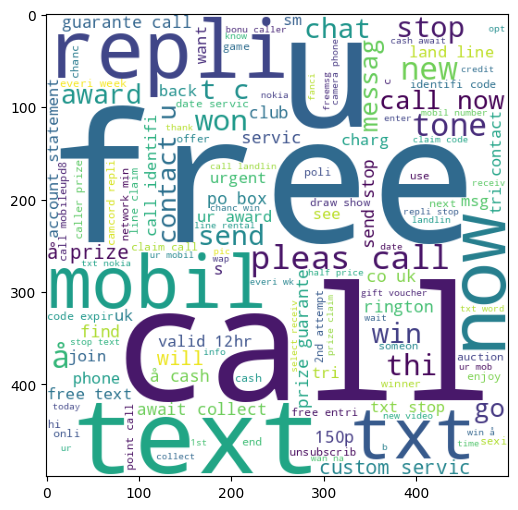

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(df[df['Spam/Ham'] == 0]['transformed_text'].str.cat(sep=" "))

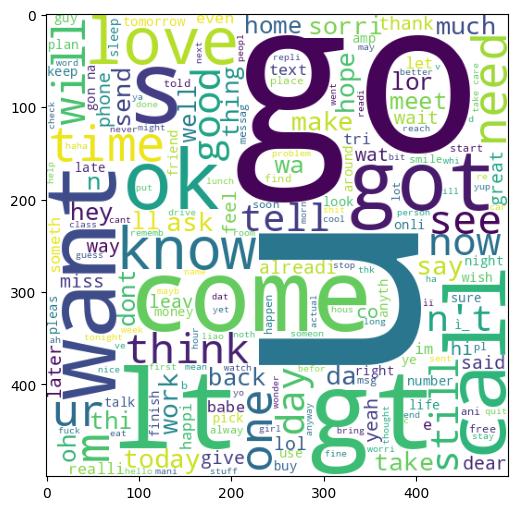

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
X.shape

(5169, 3000)

In [70]:
y = df['Spam/Ham'].values

**Model Building**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [75]:
mnb = MultinomialNB() # I experimented with multiple algorithms, but MultinomialNB delivered the best results on this dataset, so I have decided to proceed with it.

In [76]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [84]:
y_pred2 = mnb.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred2))

print("confusion_matrix",confusion_matrix(y_test,y_pred2))

print("Precision",precision_score(y_test,y_pred2))

Accuracy 0.9758220502901354
confusion_matrix [[896   0]
 [ 25 113]]
Precision 1.0


In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))